In [1]:
!pip install transformers datasets

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 471.6/471.6 kB 16.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 116.3/116.3 kB 7.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 39.9/39.9 MB 14.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 134.8/134.8 kB 6.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 194.1/194.1 kB 11.1 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does no

In [2]:
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from datasets import load_dataset
import numpy as np

# Uƒçitavanje STS-B dataseta
dataset = load_dataset("stsb_multi_mt", name="en")  # Uƒçitavanje engleske verzije

# Podela dataseta na train, validation i test setove
train_dataset = dataset['train']
validation_dataset = dataset['dev']
test_dataset = dataset['test']

# Prikaz nekih podataka
print(train_dataset[0])
print(train_dataset[1])
print(train_dataset[2])
print(train_dataset[3])
print(train_dataset[4])

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/11.4k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/470k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/108k [00:00<?, ?B/s]

dev-00000-of-00001.parquet:   0%|          | 0.00/142k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/5749 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1379 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/1500 [00:00<?, ? examples/s]

{'sentence1': 'A plane is taking off.', 'sentence2': 'An air plane is taking off.', 'similarity_score': 5.0}
{'sentence1': 'A man is playing a large flute.', 'sentence2': 'A man is playing a flute.', 'similarity_score': 3.799999952316284}
{'sentence1': 'A man is spreading shreded cheese on a pizza.', 'sentence2': 'A man is spreading shredded cheese on an uncooked pizza.', 'similarity_score': 3.799999952316284}
{'sentence1': 'Three men are playing chess.', 'sentence2': 'Two men are playing chess.', 'similarity_score': 2.5999999046325684}
{'sentence1': 'A man is playing the cello.', 'sentence2': 'A man seated is playing the cello.', 'similarity_score': 4.25}


In [3]:
# Kreiranje BERT tokenizera
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenizacija train, validation i test dataset-ova
def tokenize_function(examples):
    return tokenizer(examples['sentence1'], examples['sentence2'], truncation=True, padding=True, max_length=128)

train_encodings = tokenize_function(train_dataset)
validation_encodings = tokenize_function(validation_dataset)
test_encodings = tokenize_function(test_dataset)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [4]:
# Dodavanje 'labels' u tokenizovane podatke
train_encodings['labels'] = train_dataset['similarity_score']
validation_encodings['labels'] = validation_dataset['similarity_score']
test_encodings['labels'] = test_dataset['similarity_score']


In [5]:
from datasets import Dataset

train_dataset = Dataset.from_dict(train_encodings)
validation_dataset = Dataset.from_dict(validation_encodings)
test_dataset = Dataset.from_dict(test_encodings)

In [6]:
# Kreiranje BERT modela za regresiju
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=1)  # num_labels=1 jer se radi o regresiji

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [7]:
# Definisanje TrainingArguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
)

# Kreiranje Trainer-a
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=validation_dataset
)

In [8]:
trainer.train()

TrainOutput(global_step=2157, training_loss=0.8116096679844899, metrics={'train_runtime': 534.8347, 'train_samples_per_second': 32.247, 'train_steps_per_second': 4.033, 'total_flos': 1107870026375250.0, 'train_loss': 0.8116096679844899, 'epoch': 3.0})

In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Evaluacija modela
eval_result = trainer.evaluate()
print(f"Eval results: {eval_result}")

# Predikcija
predictions = trainer.predict(test_dataset)
predictions_array = np.array(predictions.predictions).flatten()
true_labels = np.array(test_dataset['labels'])

# Izraƒçunavanje dodatnih metrika
mae = mean_absolute_error(true_labels, predictions_array)
rmse = np.sqrt(mean_squared_error(true_labels, predictions_array))
pearson_corr = np.corrcoef(true_labels, predictions_array)[0, 1]

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Pearson Correlation Coefficient: {pearson_corr}")

# Prikaz nekoliko predikcija i stvarnih vrednosti
print("Sample of predictions:", predictions_array[:10])
print("Sample of true labels:", test_dataset['labels'][:10])

Eval results: {'eval_loss': 0.4612070322036743, 'eval_runtime': 7.5054, 'eval_samples_per_second': 199.856, 'eval_steps_per_second': 25.049, 'epoch': 3.0}
Mean Absolute Error (MAE): 0.6108707876536965
Root Mean Squared Error (RMSE): 0.8206282124887688
Pearson Correlation Coefficient: 0.8437511966766867
Sample of predictions: [4.0840516 4.089883  4.73873   4.98924   1.6542364 2.0742536 3.7066395
 1.7243736 2.3813164 1.473988 ]
Sample of true labels: [2.5, 3.5999999046325684, 5.0, 4.199999809265137, 1.5, 1.7999999523162842, 3.5, 2.200000047683716, 2.200000047683716, 1.7139999866485596]


In [10]:
import numpy as np

# Izdvajanje stvarnih vrednosti iz test seta
true_labels = np.array(test_dataset['labels'])

# Provera da su predikcije u istom formatu kao stvarne vrednosti
predictions_array = np.array(predictions.predictions).flatten()

# Provera da li su sve vrednosti ispravno formatirane
print(true_labels[:10])
print(predictions_array[:10])

[2.5        3.5999999  5.         4.19999981 1.5        1.79999995
 3.5        2.20000005 2.20000005 1.71399999]
[4.0840516 4.089883  4.73873   4.98924   1.6542364 2.0742536 3.7066395
 1.7243736 2.3813164 1.473988 ]


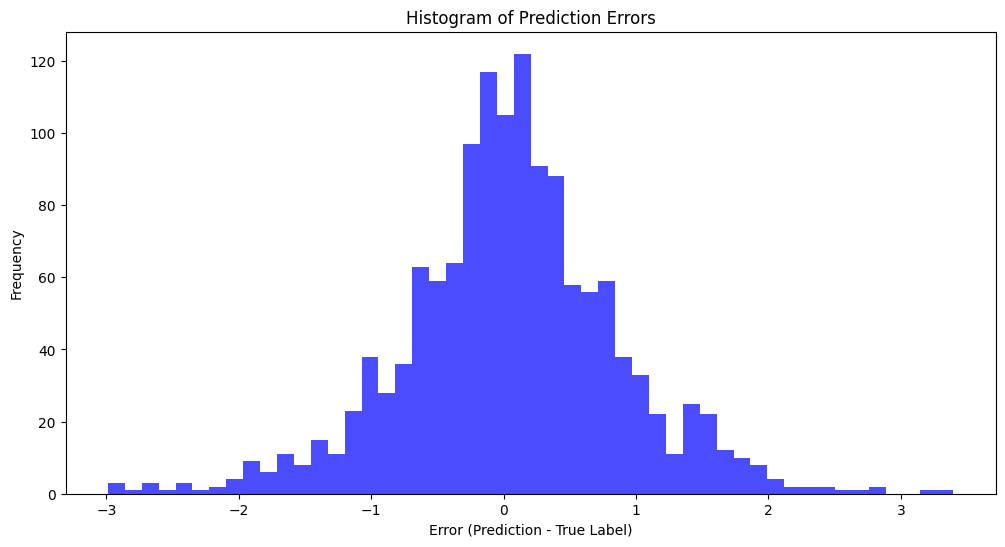

In [11]:
import matplotlib.pyplot as plt

# Histogram razlika izmeƒëu predikcija i stvarnih vrednosti
plt.figure(figsize=(12, 6))
plt.hist(predictions_array - np.array(test_dataset['labels']), bins=50, alpha=0.7, color='blue')
plt.title('Histogram of Prediction Errors')
plt.xlabel('Error (Prediction - True Label)')
plt.ylabel('Frequency')
plt.show()

Histogram prikazuje raspodelu gre≈°aka modela pri predikciji sliƒçnosti reƒçenica na STS-B datasetu. Gre≈°ka se defini≈°e kao razlika izmeƒëu predviƒëene vrednosti sliƒçnosti i stvarne vrednosti sliƒçnosti, tj. Error = Prediction - True Label.

Raspodela gre≈°aka je simetriƒçna i veƒáina gre≈°aka je koncentrisana oko nule. Ovo ukazuje da model ima uravnote≈æene predikcije i da ne favorizuje ni previsoke ni preniske vrednosti u odnosu na stvarne. Veƒáina gre≈°aka je relativno mala, ≈°to znaƒçi da su predikcije modela ƒçesto blizu stvarnih vrednosti sliƒçnosti.

Najveƒáa frekvencija gre≈°aka je u intervalu od -0.5 do 0.5, ≈°to pokazuje da je veƒáina predikcija vrlo precizna. Manji broj gre≈°aka u ekstremnim vrednostima (ispod -2 i iznad 2) ukazuje na to da model povremeno pravi veƒáe gre≈°ke, ali su takvi sluƒçajevi retki.


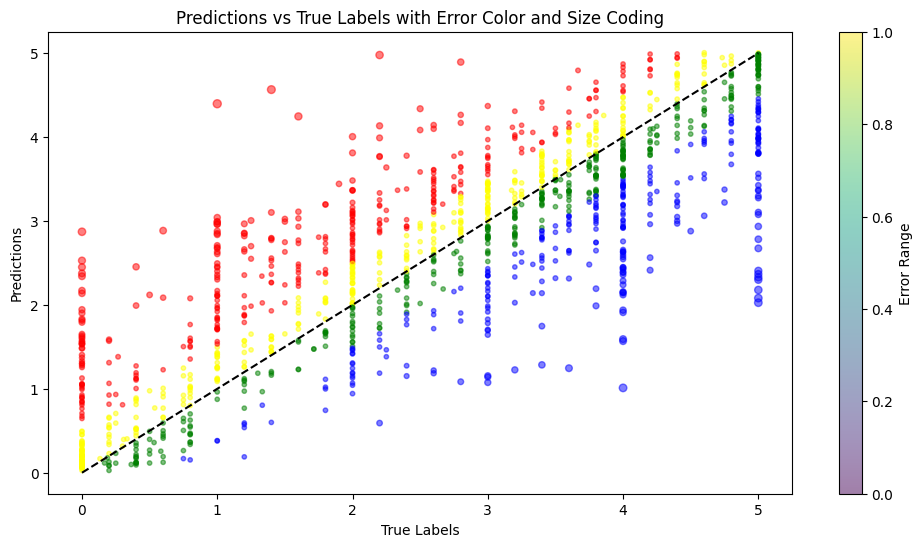

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Raƒçunanje gre≈°ke
errors = predictions_array - np.array(test_dataset['labels'])

# Definisanje granica za boje i veliƒçine taƒçaka
bins = [-np.inf, -0.5, 0, 0.5, np.inf]
colors = ['blue', 'green', 'yellow', 'red']
sizes = np.clip(np.abs(errors) * 10, 10, 100)

# Odredjivanje boje na osnovu gre≈°aka
color_indices = np.digitize(errors, bins) - 1
colors_mapped = [colors[i] for i in color_indices]

# Scatter plot sa bojama i veliƒçinama
plt.figure(figsize=(12, 6))
plt.scatter(test_dataset['labels'], predictions_array, s=sizes, c=colors_mapped, alpha=0.5)
plt.title('Predictions vs True Labels with Error Color and Size Coding')
plt.xlabel('True Labels')
plt.ylabel('Predictions')
plt.plot([0, 5], [0, 5], color='black', linestyle='--')  # Dijagonala koja pokazuje savr≈°enu taƒçnost
plt.colorbar(label='Error Range')
plt.show()

Ovaj scatter plot prikazuje predikcije modela u poreƒëenju sa stvarnim vrednostima (True Labels). Boje i veliƒçine taƒçaka na grafikonu ukazuju na veliƒçinu gre≈°aka izmeƒëu predikcija i stvarnih vrednosti. ≈†to je taƒçka dalje od crne isprekidane linije (koja predstavlja savr≈°enu taƒçnost), to je veƒáa gre≈°ka modela.

X osa predstavlja stvarne vrednosti (**True Labels**), dok Y osa prikazuje predikcije modela (**Predictions**).

Taƒçke su obojene u zavisnosti od veliƒçine gre≈°ke.


*   **Plava boja** ukazuje na velike negativne gre≈°ke (predikcija znatno ni≈æa od stvarne vrednosti).
*   **Zelena boja** ukazuje na male negativne gre≈°ke.
*   **≈Ωuta boja** oznaƒçava male pozitivne gre≈°ke.
*   **Crvena boja** ukazuje na velike pozitivne gre≈°ke (predikcija znatno vi≈°a od stvarne vrednosti).



Crna isprekidana linija na grafikonu predstavlja idealnu liniju savr≈°enih predikcija, gde bi sve taƒçke le≈æale kada bi predikcije bile identiƒçne stvarnim vrednostima. Taƒçke koje se nalaze blizu crne dijagonale predstavljaju predikcije koje su blizu stvarnim vrednostima, ≈°to ukazuje na dobru taƒçnost modela. Taƒçke sa crvenom bojom, koje su dalje od dijagonale, pokazuju gde model ima velike pozitivne gre≈°ke (npr. precenjuje vrednosti). Plave taƒçke koje se nalaze ispod dijagonale ukazuju na velike negativne gre≈°ke, gde model podcenjuje vrednosti.

Raspon i raspodela boja i veliƒçina omoguƒáava brz vizuelni pregled gde model ima tendenciju gre≈°aka i da li su te gre≈°ke sistematske ili nasumiƒçne.

In [13]:
# Random Search za pretragu najbojih parametara
import random
from transformers import Trainer, TrainingArguments
import numpy as np

# Definisanje raspona vrednosti hiperparametara
param_ranges = {
    'per_device_train_batch_size': [8, 16, 32],
    'num_train_epochs': [3, 4, 5],
    'learning_rate': [5e-5, 3e-5, 2e-5]
}

# Broj iteracija Random Search-a
num_iterations = 10

best_params = None
best_eval_loss = float('inf')

for _ in range(num_iterations):
    params = {k: random.choice(v) for k, v in param_ranges.items()}

    training_args = TrainingArguments(
        output_dir='./results',
        num_train_epochs=params['num_train_epochs'],
        per_device_train_batch_size=params['per_device_train_batch_size'],
        per_device_eval_batch_size=params['per_device_train_batch_size'],
        learning_rate=params['learning_rate'],
        warmup_steps=500,
        weight_decay=0.01,
        logging_dir='./logs',
        logging_steps=10,
        evaluation_strategy="epoch",
        save_strategy="epoch",
    )

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=validation_dataset
    )

    trainer.train()
    eval_result = trainer.evaluate()

    eval_loss = eval_result['eval_loss']
    print(f"Params: {params}, Eval results: {eval_result}")

    # Praƒáenje najboljih rezultata
    if eval_loss < best_eval_loss:
        best_eval_loss = eval_loss
        best_params = params

print(f"Best Params: {best_params}, Best Eval Loss: {best_eval_loss}")

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(


Params: {'per_device_train_batch_size': 32, 'num_train_epochs': 3, 'learning_rate': 5e-05}, Eval results: {'eval_loss': 0.4620813727378845, 'eval_runtime': 6.9892, 'eval_samples_per_second': 214.615, 'eval_steps_per_second': 6.725, 'epoch': 3.0}


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(


Params: {'per_device_train_batch_size': 32, 'num_train_epochs': 3, 'learning_rate': 5e-05}, Eval results: {'eval_loss': 0.4626220762729645, 'eval_runtime': 6.8662, 'eval_samples_per_second': 218.463, 'eval_steps_per_second': 6.845, 'epoch': 3.0}


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(


Params: {'per_device_train_batch_size': 32, 'num_train_epochs': 3, 'learning_rate': 5e-05}, Eval results: {'eval_loss': 0.4588260054588318, 'eval_runtime': 6.9277, 'eval_samples_per_second': 216.522, 'eval_steps_per_second': 6.784, 'epoch': 3.0}


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(


Params: {'per_device_train_batch_size': 32, 'num_train_epochs': 3, 'learning_rate': 5e-05}, Eval results: {'eval_loss': 0.45530641078948975, 'eval_runtime': 6.9628, 'eval_samples_per_second': 215.43, 'eval_steps_per_second': 6.75, 'epoch': 3.0}


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(


Params: {'per_device_train_batch_size': 32, 'num_train_epochs': 3, 'learning_rate': 5e-05}, Eval results: {'eval_loss': 0.45802709460258484, 'eval_runtime': 6.9252, 'eval_samples_per_second': 216.599, 'eval_steps_per_second': 6.787, 'epoch': 3.0}


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(


Params: {'per_device_train_batch_size': 32, 'num_train_epochs': 3, 'learning_rate': 5e-05}, Eval results: {'eval_loss': 0.44947272539138794, 'eval_runtime': 6.9684, 'eval_samples_per_second': 215.256, 'eval_steps_per_second': 6.745, 'epoch': 3.0}


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(


Params: {'per_device_train_batch_size': 32, 'num_train_epochs': 3, 'learning_rate': 5e-05}, Eval results: {'eval_loss': 0.46001994609832764, 'eval_runtime': 7.2123, 'eval_samples_per_second': 207.977, 'eval_steps_per_second': 6.517, 'epoch': 3.0}


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(


Params: {'per_device_train_batch_size': 32, 'num_train_epochs': 3, 'learning_rate': 5e-05}, Eval results: {'eval_loss': 0.46389302611351013, 'eval_runtime': 7.1928, 'eval_samples_per_second': 208.543, 'eval_steps_per_second': 6.534, 'epoch': 3.0}


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(


Params: {'per_device_train_batch_size': 32, 'num_train_epochs': 3, 'learning_rate': 5e-05}, Eval results: {'eval_loss': 0.4557233154773712, 'eval_runtime': 7.2642, 'eval_samples_per_second': 206.491, 'eval_steps_per_second': 6.47, 'epoch': 3.0}


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(


Params: {'per_device_train_batch_size': 32, 'num_train_epochs': 3, 'learning_rate': 5e-05}, Eval results: {'eval_loss': 0.4664444625377655, 'eval_runtime': 7.2204, 'eval_samples_per_second': 207.746, 'eval_steps_per_second': 6.509, 'epoch': 3.0}
Best Params: {'per_device_train_batch_size': 32, 'num_train_epochs': 3, 'learning_rate': 5e-05}, Best Eval Loss: 0.44947272539138794


In [14]:
# Definisanje najboljih hiperparametara (parametri koje nam je vratio Random Search)
best_params = {
    'per_device_train_batch_size': 32,
    'num_train_epochs': 3,
    'learning_rate': 5e-05
}

# Kreiranje TrainingArguments koristeƒái najbolje parametre
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=best_params['num_train_epochs'],
    per_device_train_batch_size=best_params['per_device_train_batch_size'],
    per_device_eval_batch_size=best_params['per_device_train_batch_size'],
    learning_rate=best_params['learning_rate'],
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
)

# Kreiranje Trainer-a sa optimizovanim parametrima
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=validation_dataset
)

# Ponovno treniranje modela sa najboljim parametrima
trainer.train()

# Evaluacija sa najboljim parametrima
eval_result = trainer.evaluate()
print(f"Final Eval results with best params: {eval_result}")

Final Eval results with best params: {'eval_loss': 0.4624641239643097, 'eval_runtime': 7.2765, 'eval_samples_per_second': 206.143, 'eval_steps_per_second': 6.459, 'epoch': 3.0}


In [15]:
# Predikcija
predictions = trainer.predict(test_dataset)
predictions_array = np.array(predictions.predictions).flatten()
true_labels = np.array(test_dataset['labels'])

# Izraƒçunavanje dodatnih metrika
mae = mean_absolute_error(true_labels, predictions_array)
rmse = np.sqrt(mean_squared_error(true_labels, predictions_array))
pearson_corr = np.corrcoef(true_labels, predictions_array)[0, 1]

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Pearson Correlation Coefficient: {pearson_corr}")

# Prikaz nekoliko predikcija i stvarnih vrednosti
print("Sample of predictions:", predictions_array[:10])
print("Sample of true labels:", test_dataset['labels'][:10])


Mean Absolute Error (MAE): 0.6027353890930749
Root Mean Squared Error (RMSE): 0.8121334563820318
Pearson Correlation Coefficient: 0.8465575737095719
Sample of predictions: [3.5104082 3.674241  5.071266  4.9224386 1.7124832 2.0615447 3.7044842
 1.7979985 2.214583  1.7025173]
Sample of true labels: [2.5, 3.5999999046325684, 5.0, 4.199999809265137, 1.5, 1.7999999523162842, 3.5, 2.200000047683716, 2.200000047683716, 1.7139999866485596]


In [16]:
# ƒçuvanje prethodnih vrednosti
prev_mae = 0.6017700558370608
prev_rmse = 0.8162963018699607
prev_pearson_corr = 0.8464171151057571

# Prikaz trenutnih i prethodnih vrednosti
print(f"Previous MAE: {prev_mae}, New MAE: {mae}")
print(f"Previous RMSE: {prev_rmse}, New RMSE: {rmse}")
print(f"Previous Pearson Correlation: {prev_pearson_corr}, New Pearson Correlation: {pearson_corr}")

Previous MAE: 0.6017700558370608, New MAE: 0.6027353890930749
Previous RMSE: 0.8162963018699607, New RMSE: 0.8121334563820318
Previous Pearson Correlation: 0.8464171151057571, New Pearson Correlation: 0.8465575737095719


Rezultati sa novim hiperparametrima nisu pokazali pobolj≈°anje u odnosu na rezultate koje smo postigli sa poƒçetnim modelom. Naime, do≈°lo je do poveƒáanja proseƒçne apsolutne gre≈°ke (MAE) i korena srednje kvadratne gre≈°ke (RMSE), dok su vrednosti Pearsonovog koeficijenta korelacije ostale relativno stabilne, ali su takoƒëe pokazale blago smanjenje. Ovi rezultati sugeri≈°u da su poƒçetni hiperparametri bili efikasniji za na≈° dataset. Stoga ƒáemo se vratiti na kori≈°ƒáenje poƒçetnih parametara za dalju obuku i evaluaciju modela kako bismo postigli optimalne rezultate.

In [17]:
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=1)  # num_labels=1 jer se radi o regresiji

# Defini≈°i TrainingArguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
)

# Kreiraj Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=validation_dataset
)

trainer.train()

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


TrainOutput(global_step=2157, training_loss=0.6972223453406775, metrics={'train_runtime': 475.0193, 'train_samples_per_second': 36.308, 'train_steps_per_second': 4.541, 'total_flos': 1107870026375250.0, 'train_loss': 0.6972223453406775, 'epoch': 3.0})

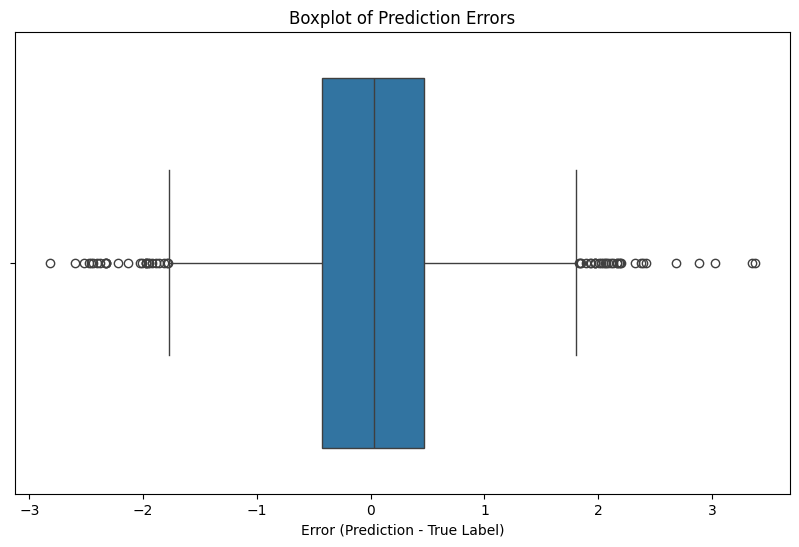

In [18]:
!pip install scikit-learn
!pip install seaborn

import seaborn as sns


errors = predictions_array - true_labels

plt.figure(figsize=(10, 6))
sns.boxplot(x=errors)
plt.title('Boxplot of Prediction Errors')
plt.xlabel('Error (Prediction - True Label)')
plt.show()

Ova slika prikazuje boxplot gre≈°aka izmeƒëu predikcija i stvarnih vrednosti modela. Boxplot pokazuje da je medijana gre≈°aka blizu nule, ≈°to ukazuje na to da model generalno dobro predviƒëa. Meƒëutim, postoje neki outliersi (udaljene taƒçke) na obe strane, ≈°to sugeri≈°e da u nekim sluƒçajevima model pravi znaƒçajne gre≈°ke. Ovi autlajeri mogu ukazivati na neobiƒçne podatke ili na potencijalno potrebne dodatne korake u pretprocesiranju ili pobolj≈°anju modela.

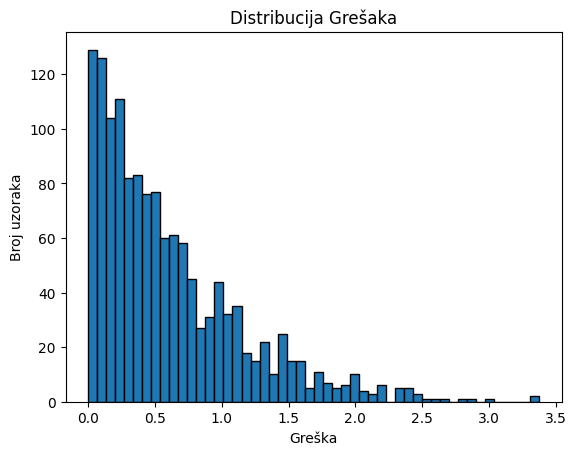

In [19]:
import matplotlib.pyplot as plt

errors = np.abs(predictions_array - np.array(test_dataset['labels']))

plt.hist(errors, bins=50, edgecolor='k')
plt.xlabel('Gre≈°ka')
plt.ylabel('Broj uzoraka')
plt.title('Distribucija Gre≈°aka')
plt.show()

Ovaj dijagram prikazuje distribuciju gre≈°aka (odstupanja predikcija od stvarnih vrednosti) u modelu. Veƒáina gre≈°aka je koncentrisana oko nule, ≈°to ukazuje na to da model generalno daje taƒçne predikcije. Kako se gre≈°ka poveƒáava, broj uzoraka sa tom gre≈°kom znaƒçajno opada, ≈°to je oƒçekivano ako model dobro funkcioni≈°e. Meƒëutim, postoji nekoliko uzoraka sa veƒáim gre≈°kama, ≈°to bi moglo ukazivati na to da model ponekad ima problema sa odreƒëenim sluƒçajevima.

In [20]:
import torch
from transformers import BertTokenizer, BertModel
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Inicijalizacija BERT tokenizera i modela
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased').to(device)

# Funkcija za generisanje BERT embedding-a iz input podataka
def get_embeddings(input_ids, attention_mask):
    inputs = {
        'input_ids': torch.tensor(input_ids).to(device),
        'attention_mask': torch.tensor(attention_mask).to(device)
    }
    with torch.no_grad():
        outputs = model(**inputs)
        embeddings = outputs.pooler_output
    return embeddings.cpu().numpy()

# Pretvaranje test dataseta u numpy nizove
input_ids = test_dataset['input_ids']
attention_mask = test_dataset['attention_mask']

# Generisanje embedding-a za reƒçenice iz test dataseta
embeddings = get_embeddings(input_ids, attention_mask)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Initial Silhouette Score: 0.4121559262275696
Initial Davies-Bouldin Index: 0.9872961462037219


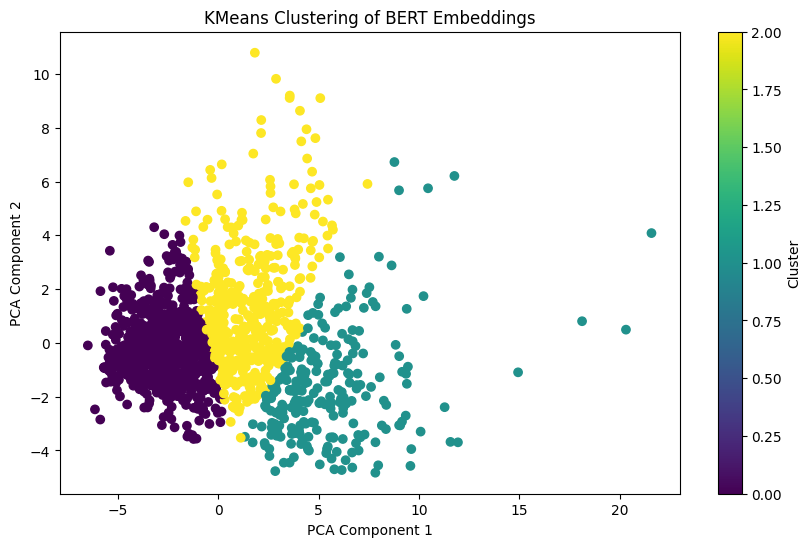

In [21]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Smanjivanje dimenzionalnosti na 2D za vizualizaciju
pca = PCA(n_components=2)
embeddings_reduced = pca.fit_transform(embeddings)

# Inicijalizacija KMeans sa poƒçetnim brojem klastera (npr. 3)
initial_n_clusters = 3

# Klasterovanje embeddings-a
kmeans_initial = KMeans(n_clusters=initial_n_clusters, random_state=42)
clusters_initial = kmeans_initial.fit_predict(embeddings_reduced)

# Raƒçunanje metrika
silhouette_initial = silhouette_score(embeddings_reduced, clusters_initial)
db_index_initial = davies_bouldin_score(embeddings_reduced, clusters_initial)

print(f"Initial Silhouette Score: {silhouette_initial}")
print(f"Initial Davies-Bouldin Index: {db_index_initial}")

# Prikaz klastera
plt.figure(figsize=(10, 6))
plt.scatter(embeddings_reduced[:, 0], embeddings_reduced[:, 1], c=clusters_initial, cmap='viridis', marker='o')
plt.title('KMeans Clustering of BERT Embeddings')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [22]:
import torch
from transformers import BertTokenizer, BertModel
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Inicijalizacija BERT tokenizera i modela
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased').to(device)

# Funkcija za generisanje BERT embedding-a kori≈°ƒáenjem mean pooling
def get_mean_pooling_embeddings(input_ids, attention_mask):
    inputs = {
        'input_ids': torch.tensor(input_ids).to(device),
        'attention_mask': torch.tensor(attention_mask).to(device)
    }
    with torch.no_grad():
        outputs = model(**inputs)
        last_hidden_state = outputs.last_hidden_state

        # Proseƒçan pooling svih skrivenih stanja za celu sekvencu
        # `mean_pooling` uzima proseƒçnu vrednost skrivenih stanja za sve tokene
        attention_mask_expanded = attention_mask.unsqueeze(-1).expand(last_hidden_state.size())
        sum_hidden_states = torch.sum(last_hidden_state * attention_mask_expanded, 1)
        sum_attention_mask = torch.sum(attention_mask_expanded[:, :, 0], 1)
        mean_pooled = sum_hidden_states / sum_attention_mask.unsqueeze(-1)

    return mean_pooled.cpu().numpy()

# Pretvaranje test dataseta u numpy nizove i konverzija u tenzore
input_ids = torch.tensor(test_dataset['input_ids']).to(device)
attention_mask = torch.tensor(test_dataset['attention_mask']).to(device)

# Generisanje embedding-a za reƒçenice iz test dataseta
mean_pooled_embeddings = get_mean_pooling_embeddings(input_ids, attention_mask)


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
<ipython-input-22-2aa8aea5b4fd>:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'input_ids': torch.tensor(input_ids).to(device),
<ipython-input-22-2aa8aea5b4fd>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'attention_mask': torch.tensor(attention_mask).to(device)


Initial Silhouette Score: 0.6719194650650024
Initial Davies-Bouldin Index: 0.4743272345020144


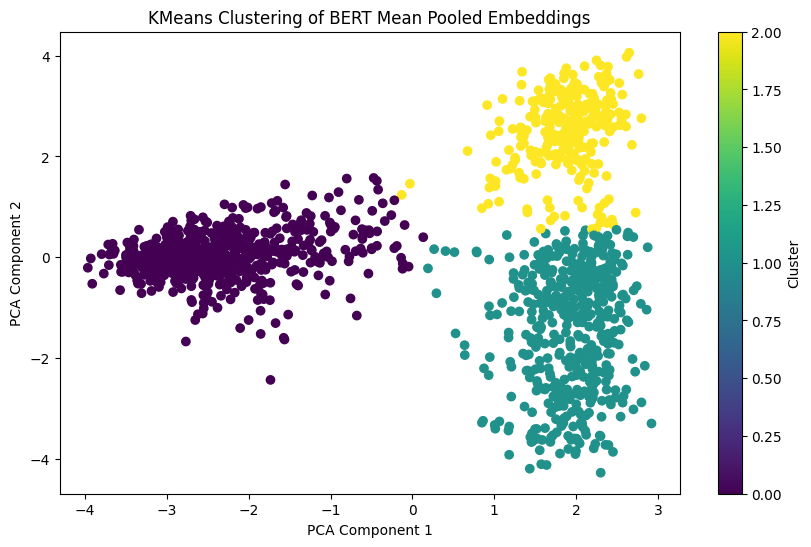

In [23]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Smanjivanje dimenzionalnosti na 2D za vizualizaciju
pca = PCA(n_components=2)
embeddings_reduced = pca.fit_transform(mean_pooled_embeddings)

# Inicijalizacija KMeans sa poƒçetnim brojem klastera (npr. 3)
initial_n_clusters = 3

# Klasterovanje embeddings-a
kmeans_initial = KMeans(n_clusters=initial_n_clusters, random_state=42)
clusters_initial = kmeans_initial.fit_predict(embeddings_reduced)

# Raƒçunanje metrika
silhouette_initial = silhouette_score(embeddings_reduced, clusters_initial)
db_index_initial = davies_bouldin_score(embeddings_reduced, clusters_initial)

print(f"Initial Silhouette Score: {silhouette_initial}")
print(f"Initial Davies-Bouldin Index: {db_index_initial}")

# Prikaz klastera
plt.figure(figsize=(10, 6))
plt.scatter(embeddings_reduced[:, 0], embeddings_reduced[:, 1], c=clusters_initial, cmap='viridis', marker='o')
plt.title('KMeans Clustering of BERT Mean Pooled Embeddings')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [24]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd


# Podela dataseta na train set
train_dataset = dataset['train']

# Ekstrakcija reƒçenica iz train dataset-a
sentences = [item['sentence1'] for item in train_dataset]

# Inicijalizacija TF-IDF vektorizatora
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(sentences)

# Izraƒçunavanje kosinusne sliƒçnosti
similarity_matrix = cosine_similarity(tfidf_matrix)

# Prikazivanje sliƒçnosti izmeƒëu prvih nekoliko reƒçenica
similarity_df = pd.DataFrame(similarity_matrix)
print(similarity_df.head())

# Prikaz sliƒçnosti izmeƒëu prvih 5 reƒçenica
for i in range(5):
    print(f"Sliƒçnost izmeƒëu reƒçenice {i+1} i drugih reƒçenica:")
    print(similarity_df.iloc[i])
    print("\n")


       0         1         2         3         4         5         6     \
0  1.000000  0.055222  0.033963  0.000000  0.053953  0.000000  0.070149   
1  0.055222  1.000000  0.095017  0.131134  0.307728  0.000000  0.196250   
2  0.033963  0.095017  1.000000  0.000000  0.092834  0.000000  0.120701   
3  0.000000  0.131134  0.000000  1.000000  0.128122  0.332016  0.000000   
4  0.053953  0.307728  0.092834  0.128122  1.000000  0.000000  0.191741   

       7         8         9     ...  5739  5740  5741      5742      5743  \
0  0.060497  0.052196  0.041476  ...   0.0   0.0   0.0  0.000000  0.230749   
1  0.345051  0.297707  0.042787  ...   0.0   0.0   0.0  0.054738  0.000000   
2  0.104094  0.135684  0.062767  ...   0.0   0.0   0.0  0.033666  0.000000   
3  0.143661  0.123950  0.000000  ...   0.0   0.0   0.0  0.000000  0.000000   
4  0.426001  0.290868  0.072270  ...   0.0   0.0   0.0  0.053481  0.000000   

   5744  5745  5746  5747  5748  
0   0.0   0.0   0.0   0.0   0.0  
1   0.0   0.

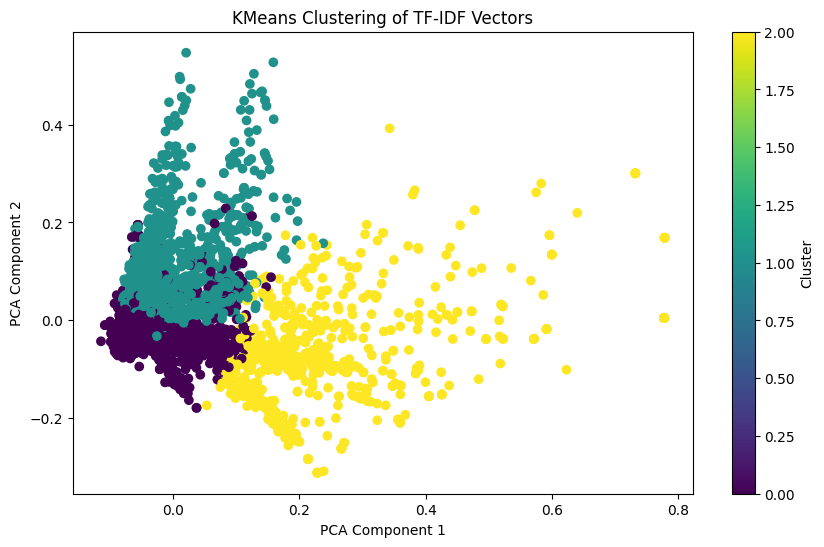

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from datasets import load_dataset


# Ekstrakcija reƒçenica iz train dataset-a
sentences = [item['sentence1'] for item in train_dataset]

# Generisanje TF-IDF matrice
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(sentences)

# Klasterovanje KMeans
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(tfidf_matrix)

# Smanjivanje dimenzionalnosti na 2D
pca = PCA(n_components=2)
tfidf_reduced = pca.fit_transform(tfidf_matrix.toarray())

# Prikaz klastera
plt.figure(figsize=(10, 6))
plt.scatter(tfidf_reduced[:, 0], tfidf_reduced[:, 1], c=clusters, cmap='viridis', marker='o')
plt.title('KMeans Clustering of TF-IDF Vectors')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()